In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import nbformat
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
import requests

url = "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"
response = requests.get(url)

with open('AgesAndHeights.pkl', 'wb') as f:
    f.write(response.content)


In [3]:
df = pd.read_pickle('AgesAndHeights.pkl')
df

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


<Axes: >

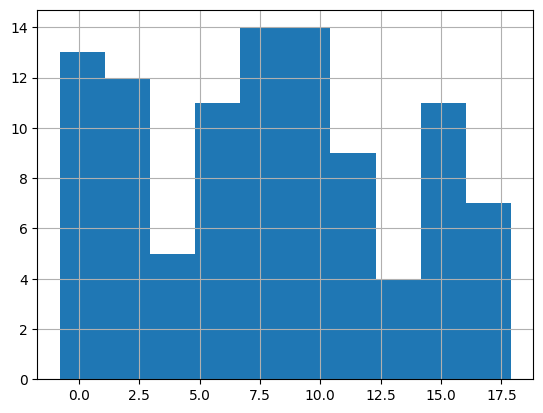

In [4]:
ages = df['Age']
heights = df['Height']
ages[ages < 0]
ages.hist()

In [5]:
df = df[df['Age'] > 0]
df

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

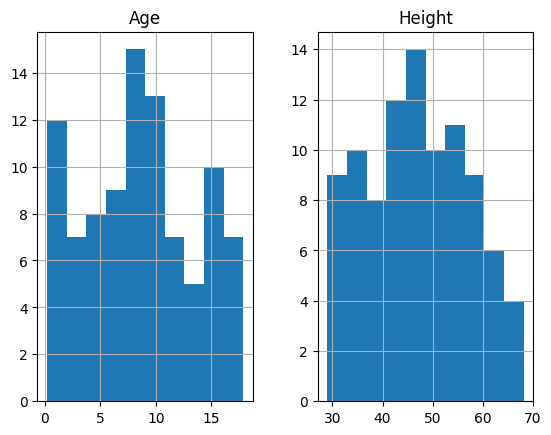

In [6]:
ages = df['Age']
heights = df['Height']
df.hist()

<Axes: xlabel='Age', ylabel='Height'>

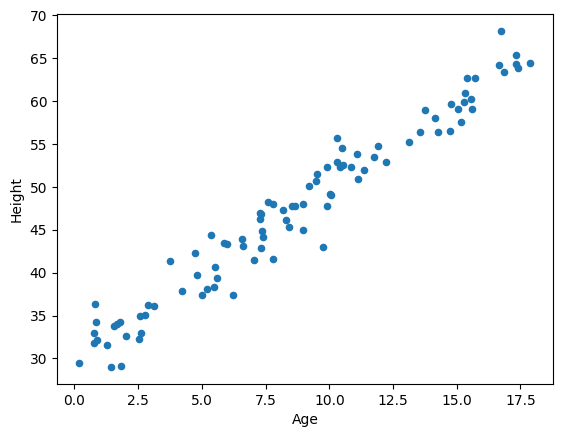

In [7]:
df.plot.scatter(x = 'Age', y = 'Height')

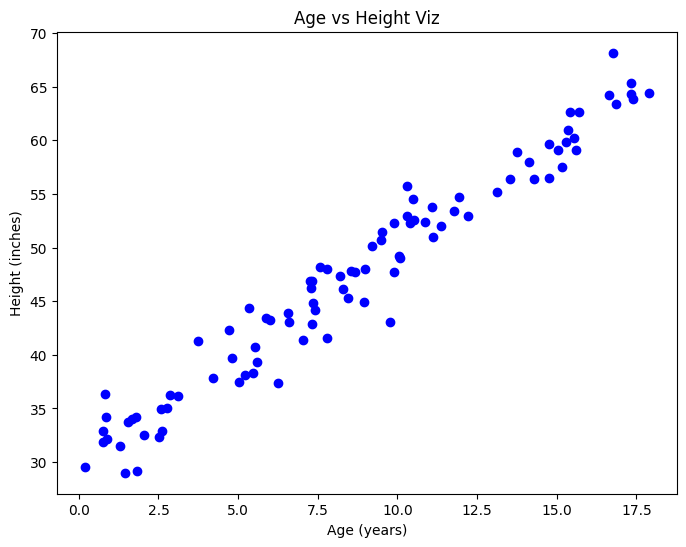

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(ages,heights,color='blue',marker='o')
plt.title('Age vs Height Viz')
plt.xlabel('Age (years)')
plt.ylabel('Height (inches)')
plt.show()

In [14]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()
print(ages_np.shape, heights_np.shape)

(93,) (93,)


In [15]:
ages_reshaped = ages_np.reshape(len(ages_np),1)
ages_reshaped

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0.19568558],
       [ 0.89217393],
       [ 7.30979593],
       [10.8545723 ],
       [15.69876495],
       [ 0

In [17]:
model = LinearRegression()
model.fit(ages_reshaped, heights_np)
model.coef_

array([2.0014169])

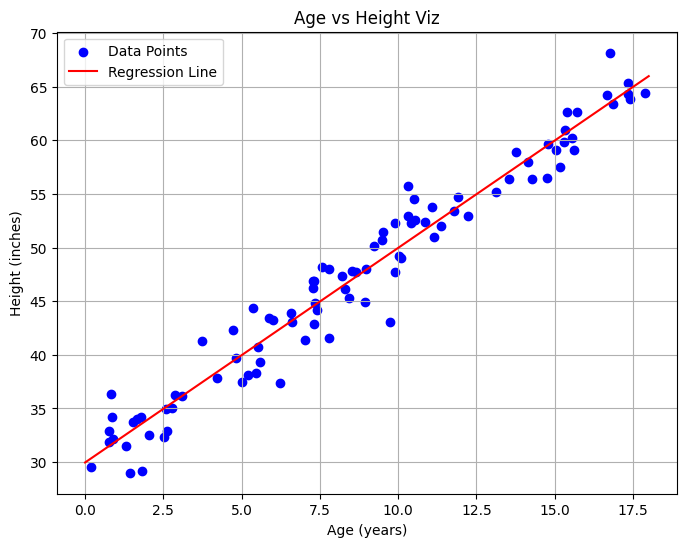

In [56]:
x_new = np.array(list(range(19)))
x_new_reshaped = x_new.reshape(19,1)
preds = model.predict(x_new_reshaped)
plt.figure(figsize=(8,6))
plt.scatter(ages,heights,color='blue',marker='o', label = 'Data Points')
plt.plot(x_new_reshaped, preds, color='red', label = 'Regression Line')
plt.title('Age vs Height Viz')
plt.xlabel('Age (years)')
plt.ylabel('Height (inches)')
plt.legend()
plt.grid(True)
plt.savefig('base_img.png')
plt.show()

In [29]:
from joblib import dump, load

In [30]:
dump(model, 'model.joblib')


['model.joblib']

In [31]:
model_in = load('model.joblib')

In [32]:
model_in.predict(np.array([[1]]))

array([31.96327451])

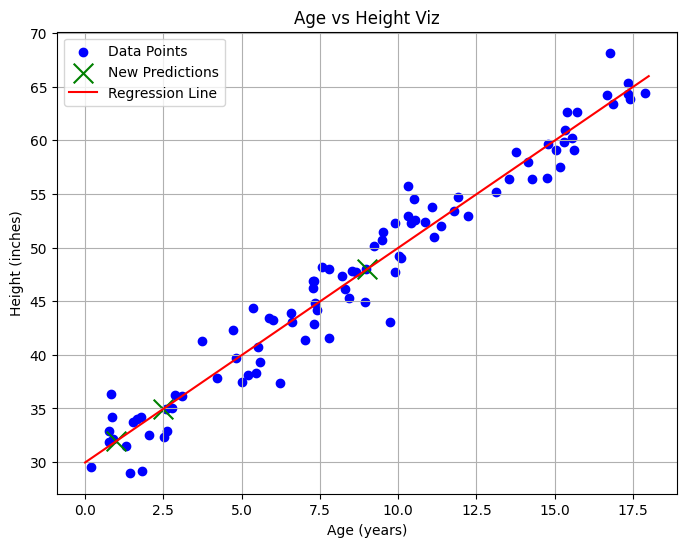

In [55]:
def make_picture(training_data_filename, model, new_inputs, output_file):
    data = pd.read_pickle(training_data_filename)
    ages = data['Age']
    data = data[ages > 0]
    ages = data['Age']
    heights = data['Height']
    x_new = np.array(list(range(19)))
    x_new_reshaped = x_new.reshape(19,1)
    preds = model.predict(x_new_reshaped)
    new_inputs_array = np.array(new_inputs)
    new_inputs_reshaped = new_inputs_array.reshape(-1,1)
    new_preds = model.predict(new_inputs_reshaped)
    
    plt.figure(figsize=(8,6))
    plt.scatter(ages,heights,color='blue',marker='o', label = 'Data Points')
    plt.scatter(new_inputs_reshaped, new_preds, color='green', marker='x', s=200, label='New Predictions')
    plt.plot(x_new_reshaped, preds, color='red', label = 'Regression Line')
    plt.title('Age vs Height Viz')
    plt.xlabel('Age (years)')
    plt.ylabel('Height (inches)')
    plt.legend()
    plt.grid(True)
    plt.savefig(output_file)
    plt.show()
make_picture('AgesAndHeights.pkl', model_in, float_string_to_npArray('1, ' ', 9, 2.5'), output_file= 'img.png')

In [52]:
def float_string_to_npArray(floats_str):
    def is_float(x):
        try:
            float(x)
            return True
        except:
            return False
    floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
    return floats.reshape(len(floats), 1)

array([[1. ],
       [2.5]])